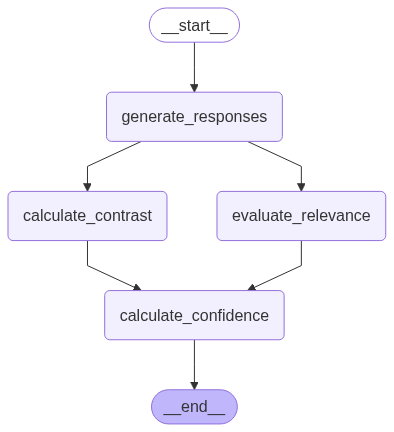

In [1]:
from agent import create_response_graph

graph = create_response_graph(None)
graph

In [2]:
from pprint import pprint

result = await graph.ainvoke({
	"messages": [
		("human", "What is the capital of France?")
	],
	"responses": []
})

pprint(result)


httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
{'confidence_score': 1.0,
 'contrast_score': 1.0,
 'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='2a22d23e-6a1e-4ed9-99fa-7c8c79c55e28'),
              AIMessage(content='The capital of France is **Paris**.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 14, 'total_tokens': 23, 'completion_tokens_detail

In [3]:
result = await graph.ainvoke({
	"messages": [
		("human", "where is the location of 2025 **AI Engineer World's Fair Agents Hackathon** in SF?")
	],
	"responses": []
})


pprint(result)


httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
{'confidence_score': 0.5833333333333334,
 'contrast_score': 0.2,
 'messages': [HumanMessage(content="where is the location of 2025 **AI Engineer World's Fair Agents Hackathon** in SF?", additional_kwargs={}, response_metadata={}, id='7824839d-fec2-43ac-bcce-efcee016139d'),
              AIMessage(content="As of now, there is **no publicly available official information** regarding the specific location or venue for the **2025 AI Enginee

In [7]:
result["relevance_scores"]

[1.0, 0.0, 0.6]